In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
%matplotlib inline
mpl.rcParams['patch.force_edgecolor'] = True
sns.set()

In [9]:
df1 = pd.read_csv('takehome_user_engagement.csv')

# Convert dates to datetime objs
df1['time_stamp'] = list(map(lambda x: datetime.strptime(x.split()[0],'%Y-%m-%d'), df1['time_stamp'])) 

print("Rows, columns: ", df1.shape)
print("Earliest time_stamp: ", df1['time_stamp'].min())
print("Latest time_stamp: ", df1['time_stamp'].max(), '\n')
df1.head()

Rows, columns:  (207917, 3)
Earliest time_stamp:  2012-05-31 00:00:00
Latest time_stamp:  2014-06-06 00:00:00 



,time_stamp,user_id,visited
0,2014-04-22,1,1
1,2013-11-15,2,1
2,2013-11-29,2,1
3,2013-12-09,2,1
4,2013-12-25,2,1


In [3]:
# Import
df = pd.read_csv('takehome_users.csv',  encoding='latin-1')

# Convert dates to datetime objs
df['creation_time'] = list(map(lambda x: datetime.strptime(x.split()[0],'%Y-%m-%d'), df['creation_time'])) # also removes hour, min, sec

print("Rows, columns: ", df.shape)
print("Earliest creation_time: ", df['creation_time'].min())
print("Latest creation_time: ", df['creation_time'].max())
df.head()

Rows, columns:  (12000, 10)
Earliest creation_time:  2012-05-31 00:00:00
Latest creation_time:  2014-05-30 00:00:00


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
print("Number of unique user id's: ", len(df['object_id'].unique()))
print("Number of unique user names: ", len(df['name'].unique()))
print("Number of unique emails: ", len(df['email'].unique()))

Number of unique user id's:  12000
Number of unique user names:  11355
Number of unique emails:  11980


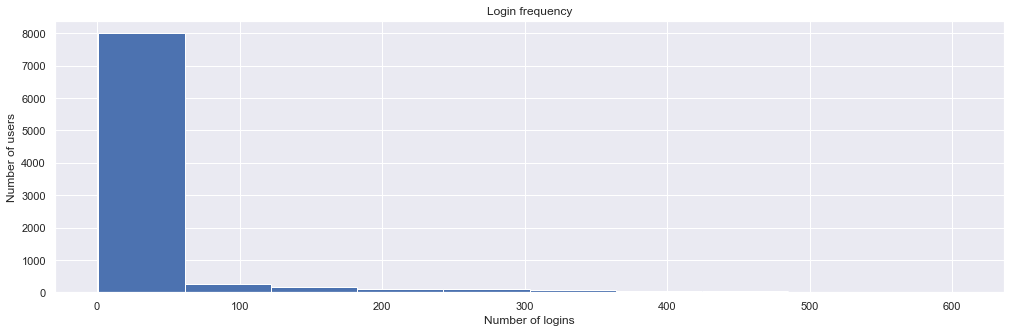

In [10]:
plt.figure(figsize=(17,5));
plt.hist(df1.groupby('user_id').size());
plt.title('Login frequency');
plt.xlabel('Number of logins');
plt.ylabel('Number of users');

In [13]:
user_timestamps = [] 
for idx, row in df.iterrows():
    user_id = row['object_id']
    timestamps = df1[df1['user_id']==user_id]['time_stamp']
    t = [i for i in timestamps]
    user_timestamps.append(t)

In [18]:
def adopted(x):
    if len(x) < 3:
        return 0
    else:
        x.sort()  
        y = [x[i+1] - x[i] for i in range(len(x)-2)]
        y = [i for i in y if i > timedelta(days=0)] 
        z = [1 for i in range(len(y)-2) if y[i] + y[i+1] + y[i+2] <= timedelta(days=7)]
        
        if 1 in z:
            return 1
        else:
            return 0

        
adopt_total = []
for user in user_timestamps:
        adopt_total.append(adopted(user))

df['adopted'] = adopt_total

print("Number of adopted users: ", sum(adopt_total))
print("Fraction adopted users: ", sum(adopt_total)/len(adopt_total))

Number of adopted users:  1322
Fraction adopted users:  0.11016666666666666
